In [2]:
import pandas as pd 
from sklearn import metrics

In [8]:
dir(metrics._plot.confusion_matrix)

['ConfusionMatrixDisplay',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'check_matplotlib_support',
 'confusion_matrix',
 'is_classifier',
 'np',
 'product',
 'unique_labels']

In [11]:
metrics.ConfusionMatrixDisplay??

Init signature: metrics.ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
Source:        
class ConfusionMatrixDisplay:
    """Confusion Matrix visualization.

    It is recommend to use
    :func:`~sklearn.metrics.ConfusionMatrixDisplay.from_estimator` or
    :func:`~sklearn.metrics.ConfusionMatrixDisplay.from_predictions` to
    create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
    attributes.

    Read more in the :ref:`User Guide <visualizations>`.

    Parameters
    ----------
    confusion_matrix : ndarray of shape (n_classes, n_classes)
        Confusion matrix.

    display_labels : ndarray of shape (n_classes,), default=None
        Display labels for plot. If None, display labels are set from 0 to
        `n_classes - 1`.

    Attributes
    ----------
    im_ : matplotlib AxesImage
        Image representing the confusion matrix.

    text_ : ndarray of shape (n_classes, n_classes), dtype=matplotlib Text, \
            or None
        Arr

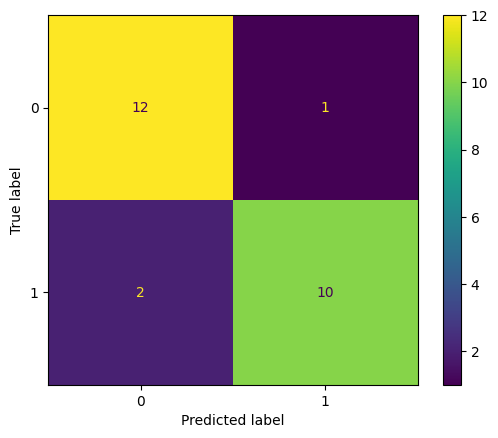

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [17]:
X = pd.read_csv("X.csv")
test_data = pd.read_csv("test_data.csv")
print(X.columns==test_data.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
del XGBRFClassifier

In [22]:
!pwd

/c/Users/user/Desktop/ML_Marathon


In [23]:
from sklearn.preprocessing import LabelBinarizer
xgb_lb = LabelBinarizer()

train_data = pd.read_csv("Data/Datasets/Multi_class_obesity_prediction/train.csv(1)/train.csv")
y = train_data["NObeyesdad"]
y.head()

0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [25]:
test_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_male,family_history_with_overweight_true,...,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Frequently,CALC_Sometimes,CALC_no,CALC_Always,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,True,True,...,1,0,0,1,0,0,0,0,1,0
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,False,True,...,1,0,0,1,0,0,0,0,1,0
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,False,True,...,1,0,0,1,0,0,0,0,1,0
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,True,True,...,1,0,0,1,0,0,0,0,1,0
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,False,True,...,1,0,0,1,0,0,0,0,1,0


In [26]:
param_grid = {
    'max_depth':[3,4,5,6],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10],
    'scale_pos_weight':[1,3,5]
}

In [27]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb,param_grid=param_grid,cv=7)
grid_xgb.fit(X, xgb_lb.fit_transform(y),verbose=True)

GridSearchCV(cv=7,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 6], 'reg_lambda': [0, 1.0, 10],
                         'scale_pos_weight': [1, 3, 5]})

In [28]:
grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
grid_xgb.best_params_

{'gamma': 1.0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1}

In [32]:
xgb_tune = XGBClassifier(gamma=1.0,
                         learning_rate=0.1,
                         max_depth=6,
                         reg_lambda=1.0,
                         scale_pos_weight=1
                         )

In [33]:
xgb_tune.fit(X, xgb_lb.fit_transform(y))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
grid_pred = grid_xgb.predict(test_data)
xgb_pred_tune = xgb_tune.predict(test_data)

dat = pd.read_csv("EDA/xgb_data_pred.csv")

In [37]:
print(grid_pred in xgb_pred_tune)

True


In [40]:
xgb_pred_tune = xgb_lb.inverse_transform(xgb_pred_tune)

In [41]:
dat.id

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [46]:
x = xgb_pred_tune == dat.NObeyesdad

In [51]:
a=0
for i in x:
    if i == False:
        a+=1

In [52]:
a

1405

In [53]:
len(x)

13840

In [55]:
data = {
    'id':dat.id,
    'NObeyesdad':xgb_pred_tune
}
tuned = pd.DataFrame(data)

In [56]:
tuned.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [57]:
tuned.to_csv("tuned.csv",index=None)